In [10]:
from astroquery.jplhorizons import Horizons
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functions
import subprocess
import os
import time

Object and observatory details

In [37]:
object = 'Astraea'
end_date = '2024-01-30'
start_date = '2023-08-30'
step = '3d'
obs_code = 995

Import Horizons data

In [38]:
eph = functions.get_jpl_ephemeris(object, obs_code, start_date, end_date, step)
jpl_peri_arg, jpl_sma, jpl_asc_node, jpl_eccentricity, jpl_inc, jpl_period, jpl_peri_dist, jpl_apogee_dist = functions.get_jpl_elements(object)
jpl_elements = np.array([jpl_peri_arg, jpl_sma, jpl_asc_node, jpl_eccentricity, jpl_inc, jpl_period, jpl_peri_dist, jpl_apogee_dist], dtype=np.float64)

Plot difference between JPL Horizons orbital elements and those returned by find_orb for the JPL Horizons astrometry

2023-Aug-30 00:00
2023 08 30.00000
2023-Sep-02 00:00
2023 09 02.00000
2023-Sep-05 00:00
2023 09 05.00000
2023-Sep-08 00:00
2023 09 08.00000
2023-Sep-11 00:00
2023 09 11.00000
[-0.07547259  0.10494406  0.04759931  0.12368737 -0.01817598  0.1593528
  0.07646919  0.12444516]
5 -0.07547259187309706
5 0.10494406031210542
5 0.04759930904059723
5 0.1236873724813001
5 -0.01817598027921189
5 0.15935280230256427
5 0.07646919360545605
5 0.12444515705590434
2023-Aug-30 00:00
2023 08 30.00000
2023-Sep-02 00:00
2023 09 02.00000
2023-Sep-05 00:00
2023 09 05.00000
2023-Sep-08 00:00
2023 09 08.00000
2023-Sep-11 00:00
2023 09 11.00000
2023-Sep-14 00:00
2023 09 14.00000
[ 0.12040518 -0.19789895  0.00753791 -0.25930104 -0.00959478 -0.29474003
 -0.13806863 -0.23881365]
6 0.12040517920125558
6 -0.19789894584919054
6 0.007537913444569856
6 -0.2593010416563004
6 -0.009594778198261955
6 -0.2947400307518372
6 -0.1380686287112273
6 -0.23881365198275664
2023-Aug-30 00:00
2023 08 30.00000
2023-Sep-02 00:00
2023 09

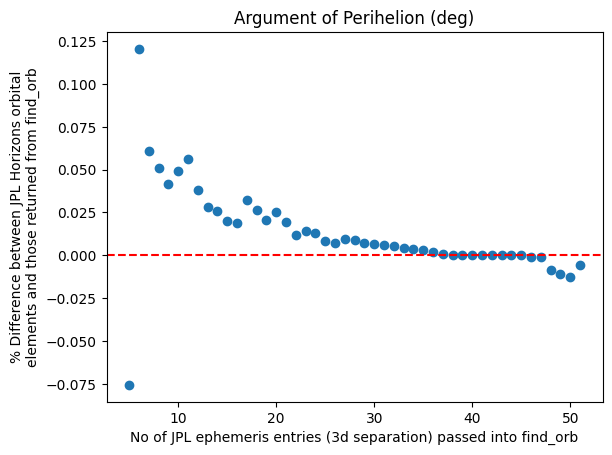

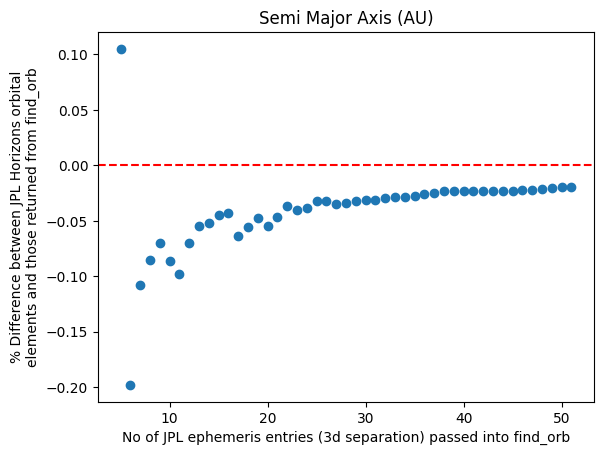

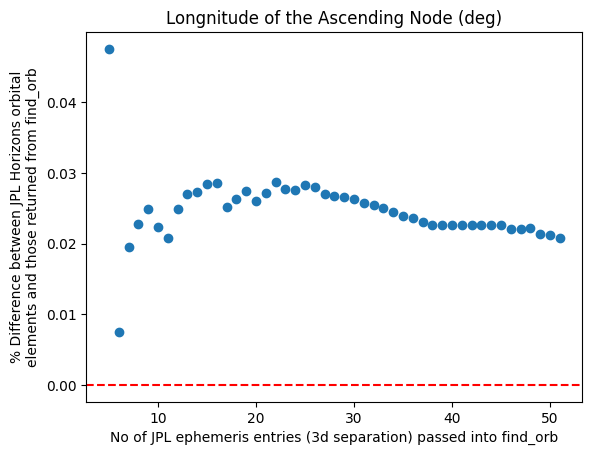

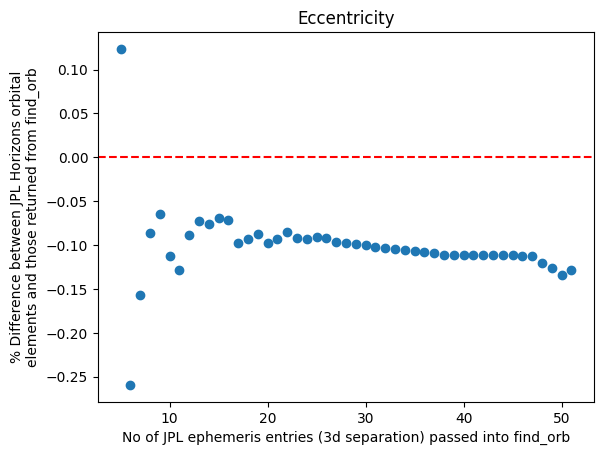

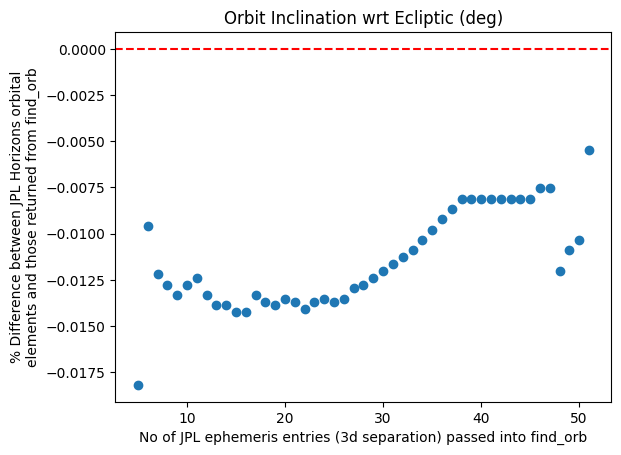

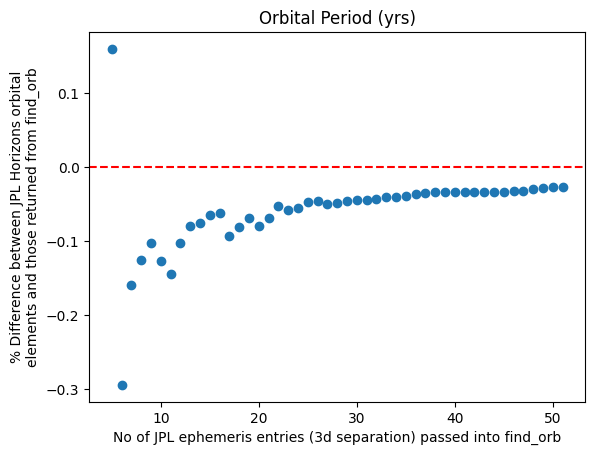

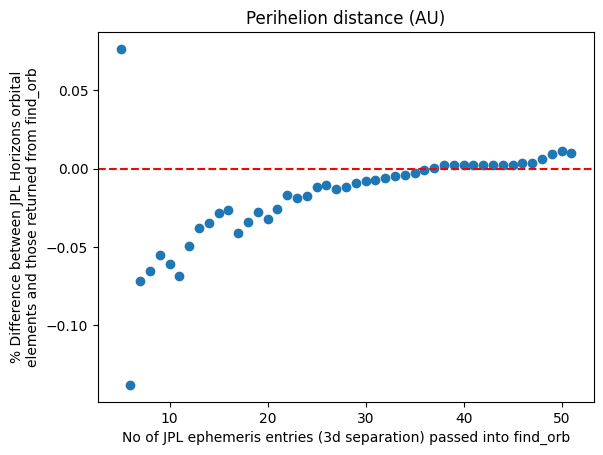

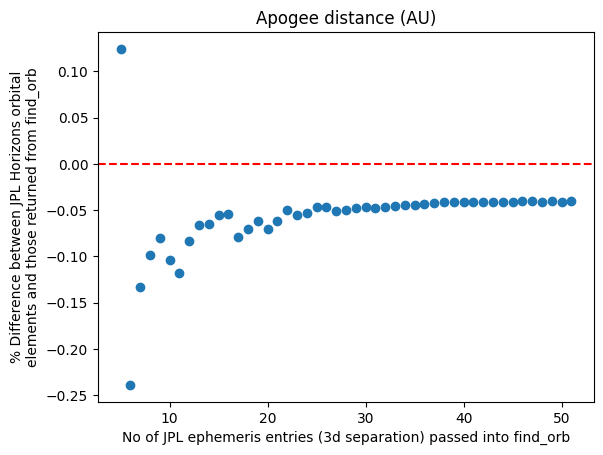

In [40]:
diffs = [[],[],[],[],[],[],[],[]]
no_of_obs = []

for j in range(5, len(eph)):
    #converts object name to the correct format for find_orb.
    object_list = []
    for l in range(0, 12):
        try:
            object_list.append(object[l])
        except:
            object_list.append(' ')
    object_designation = ''.join(map(str, object_list))

    functions.read_jpl_ephemeris(eph, object_designation, obs_code, rows_to_read=j)
    functions.run_find_orb('jpl_eph.txt')

    fo_peri_arg, fo_sma, fo_asc_node, fo_eccentricity, fo_inc, fo_period, fo_peri_dist, fo_apogee_dist = functions.read_fo_elements('elements.txt')
    fo_elements = np.array([fo_peri_arg, fo_sma, fo_asc_node, fo_eccentricity, fo_inc, fo_period, fo_peri_dist, fo_apogee_dist], dtype=np.float64)
    
    diff = (np.subtract(jpl_elements,fo_elements)/fo_elements)*100
    print(diff)
    for k in range(0, len(diff)):
        print(j, diff[k])
        diffs[k].append(diff[k])
    no_of_obs.append(j)

print(diffs)
print(no_of_obs)
elements = ['Argument of Perihelion (deg)', 'Semi Major Axis (AU)', 'Longnitude of the Ascending Node (deg)', 'Eccentricity', 'Orbit Inclination wrt Ecliptic (deg)', 'Orbital Period (yrs)', 'Perihelion distance (AU)', 'Apogee distance (AU)']
for i in range(0, len(diffs)):
    plt.figure(i)
    plt.xlabel(f'No of JPL ephemeris entries ({step} separation) passed into find_orb')
    plt.ylabel('% Difference between JPL Horizons orbital\nelements and those returned from find_orb')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'{elements[i]}')
    plt.scatter(no_of_obs, diffs[i])